In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

%matplotlib inline

# mac OS 에서 한글이 깨진다면 참고.
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Colab
# !apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# XGBoost

- xgboost는 사이킷런에서 제공하지 않기 때문에 별도의 설치과정이 필요하다.
- https://xgboost.readthedocs.io/en/latest/build.html (공식 문서 영문)를 참고하여 설치

부록으로 따로 빼기
- http://corazzon.github.io/xgboost-install-mac-osx (macOS 한글)
- http://quantfactory.blogspot.com/2017/04/xgboost.html (window 한글)

- XGBoost는 GBM(Gradient Boosting)의 결정 트리를 구성할 때 병렬 처리를 사용하여, 수행시간을 GBM에 비해 훨씬 단축시켰다.

In [3]:
!pip install xgboost

In [4]:
import xgboost as xgb

model = xgb.XGBClassifier()

### XGboost의 파라미터
- XGboost의 경우에는 파라미터를 3개의 범주로 나눈다. 일반적인 파라미터(General parameters), 부스터 파라미터(Booster parameters), 학습 과정 파라미터(Learning Task parameters)로 구성 되어있다.  

#### General parameters
- booster : 어떤 부스터 구조를 쓸 것인지 정하는 파라미터이다. gbtree(결정트리), gblinear(선형모델), dart(Drop out Regression Trees)가 있고 기본값은 'gbtree'이다, gbtree의 성능이 제일 낫다.  
- n_jobs : xgboost를 실행시 병렬처리에 사용되는 코어 수, 따로 값을 주지 않으면 자동적으로 코어를 탐지하여 사용.  
- num_feature : 특성의 수를 정해줘야 하는 경우에 사용.  

#### Booster parameters
- learning_rate : 가중치를 정해주는 파라미터이다.    
- gamma : 트리가 분할을 할 때 필요한 최소 손실 감소(Minimum Loss reduction)를 지정해준다, 값이 커지면 트리의 깊이가 줄어들어 보수적인 모델이 된다.  
- max_depth : 트리의 깊이를 정해주는 파라미터  
- reg_lambda : L2 norm. 값이 커질수록 모델이 보수적으로 변한다.  
- reg_alpha : L1 norm. 값이 커질수록 모델이 보수적으로 변한다.  

#### Learning Task parameters
- objective : 목적함수를 정해주는 파라미터이다.  
    - binary:logistic는 이진분류, multi:softmax는 softmax는 다중 클래스 분류이다. 이 외에도 multi:softprob , rank:map 등 다양한 값들이 존재한다.  
- eval_metric : 모델의 평가 함수를 설정하는 파라미터로 회귀분석이면 'rmse', 분류 문제에는 'error'를 기본값으로 사용한다, objective에 따라 기본값이 설정되어 있다.  
    - rmse(root mean square error), mae(mean absolute error), error(Binary classification error rate) 등 여러 값들이 존재한다.  

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, shuffle = True)

In [6]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                             learning_rate = 0.1,
                             max_depth=1).fit(X_train, y_train)

In [7]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

- 직접 만든 모델의 파라미터 설정을 확인할 수 있다.
- 유방암 데이터의 y값은 0과 1로 되어있어 objective가 binary:logist로 자동으로 설정되어 있는 것을 볼 수 있다.

In [8]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.9849246231155779
test score : 0.9824561403508771


In [9]:
xgb_model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
xgb_model.predict_proba(X_test)

array([[0.4916432 , 0.5083568 ],
       [0.99479324, 0.00520677],
       [0.07931924, 0.92068076],
       [0.00177974, 0.99822026],
       [0.01591027, 0.98408973],
       [0.98210377, 0.01789623],
       [0.989548  , 0.01045195],
       [0.989548  , 0.01045195],
       [0.01389545, 0.98610455],
       [0.5450538 , 0.45494622],
       [0.9970179 , 0.00298211],
       [0.07101226, 0.92898774],
       [0.10095245, 0.89904755],
       [0.9823055 , 0.0176945 ],
       [0.01124364, 0.98875636],
       [0.03062004, 0.96937996],
       [0.00386441, 0.9961356 ],
       [0.00827581, 0.9917242 ],
       [0.00866669, 0.9913333 ],
       [0.01700604, 0.98299396],
       [0.08413792, 0.9158621 ],
       [0.00497526, 0.99502474],
       [0.9787865 , 0.0212135 ],
       [0.9951407 , 0.00485933],
       [0.99503285, 0.00496713],
       [0.27209842, 0.7279016 ],
       [0.6008264 , 0.39917362],
       [0.0159111 , 0.9840889 ],
       [0.9812821 , 0.01871791],
       [0.2511539 , 0.7488461 ],
       [0.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


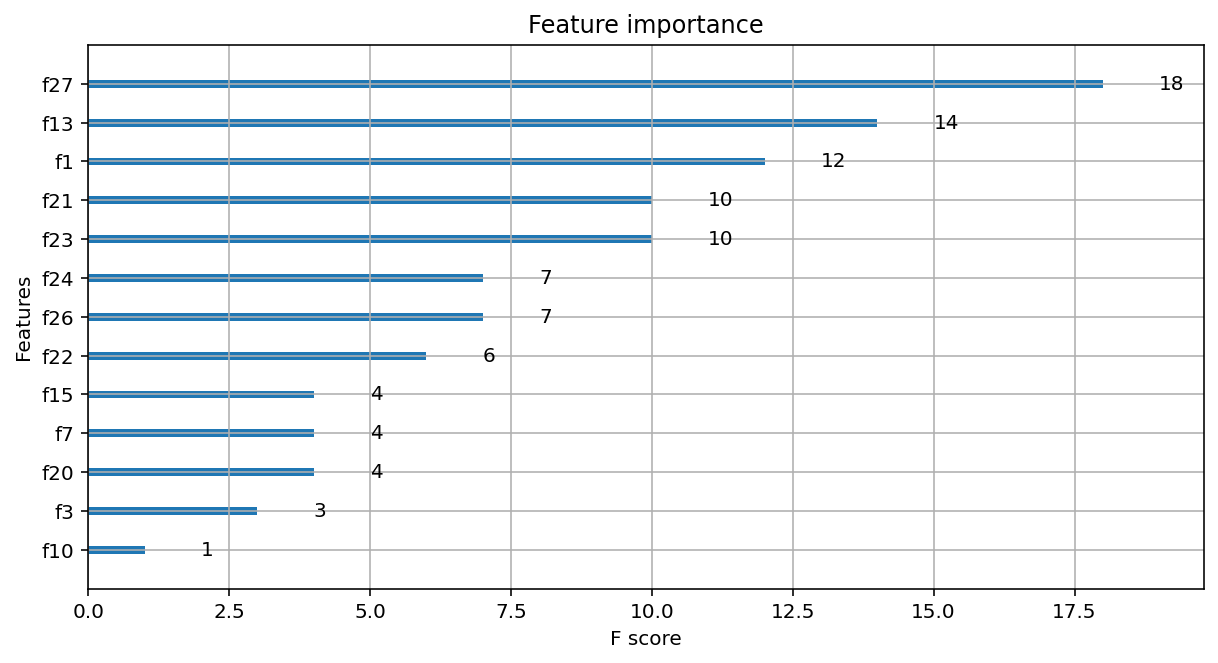

In [10]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(xgb_model, ax = ax)
plt.show()

- xgboost의 plot_importance로 모델이 어떤 특성에 의존하고 있는지를 확인할 수 있다 또한 직접 만든 데이터의 경우 특성들이 유효한지 확인해 볼 수도 있다.

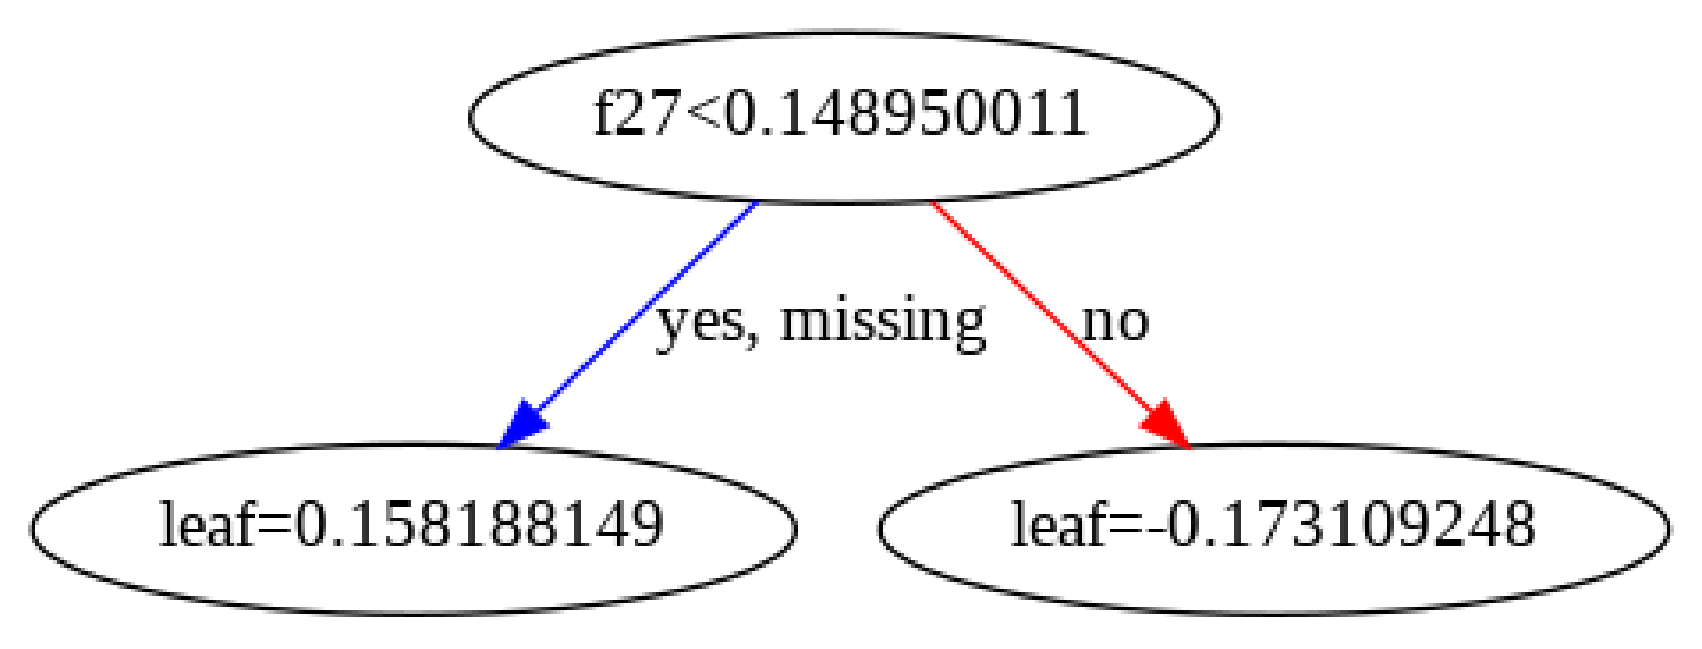

In [11]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(xgb_model, ax = ax)
plt.show()

- plot_tree를 이용해서 트리를 시각화할 수 있다.

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [ ]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                             learning_rate = 0.1,
                             max_depth=1,
                             n_estimators=10).fit(X_train, y_train)

In [ ]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

- 유방암 데이터와는 다르게 와인데이터에는 0, 1, 2의 y값을 가진다 따라서 xgboost모델은 자동적으로 objective = 'multi:softporb'으로 되어있는 것을 확인할 수 있다.

In [ ]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.9838709677419355
test score : 0.9444444444444444


In [ ]:
xgb_model.predict(X_test)

array([1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 2])

In [ ]:
xgb_model.predict_proba(X_test)

array([[0.11808559, 0.5414964 , 0.34041798],
       [0.15470268, 0.17635222, 0.66894513],
       [0.6590182 , 0.18175888, 0.15922287],
       [0.15470268, 0.17635222, 0.66894513],
       [0.6590182 , 0.18175888, 0.15922287],
       [0.54817575, 0.3193816 , 0.13244265],
       [0.54817575, 0.3193816 , 0.13244265],
       [0.6590182 , 0.18175888, 0.15922287],
       [0.3186189 , 0.3632073 , 0.3181738 ],
       [0.14299585, 0.31040615, 0.546598  ],
       [0.18514957, 0.21105993, 0.6037905 ],
       [0.15470268, 0.17635222, 0.66894513],
       [0.40345684, 0.12445527, 0.4720879 ],
       [0.54817575, 0.3193816 , 0.13244265],
       [0.6590182 , 0.18175888, 0.15922287],
       [0.6590182 , 0.18175888, 0.15922287],
       [0.26084608, 0.50625944, 0.23289447],
       [0.13342576, 0.289632  , 0.57694227],
       [0.39823008, 0.49415806, 0.10761184],
       [0.10629137, 0.48741257, 0.40629607],
       [0.13342576, 0.289632  , 0.57694227],
       [0.6590182 , 0.18175888, 0.15922287],
       [0.

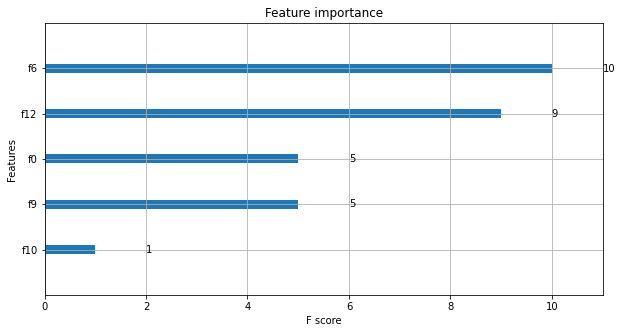

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(xgb_model, ax = ax)
plt.show()

- 어떤 특성들이 유효한지 확인할 수 있다.

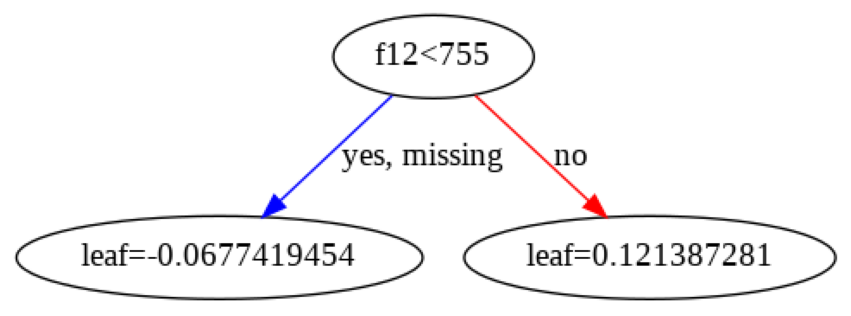

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(xgb_model, ax=ax)
plt.show()